In [1]:
%load_ext kedro.ipython

[04/22/24 20:02:02] INFO     Registered line magic '%reload_kedro'                                   ]8;id=13747;file:///opt/anaconda3/envs/genai/lib/python3.10/site-packages/kedro/ipython/__init__.py\__init__.py]8;;\:]8;id=864346;file:///opt/anaconda3/envs/genai/lib/python3.10/site-packages/kedro/ipython/__init__.py#51\51]8;;\

                    INFO     Registered line magic '%load_node'                                      ]8;id=502593;file:///opt/anaconda3/envs/genai/lib/python3.10/site-packages/kedro/ipython/__init__.py\__init__.py]8;;\:]8;id=525308;file:///opt/anaconda3/envs/genai/lib/python3.10/site-packages/kedro/ipython/__init__.py#53\53]8;;\

                    INFO     Resolved project path as:                                              ]8;id=801832;file:///opt/anaconda3/envs/genai/lib/python3.10/site-packages/kedro/ipython/__init__.py\__init__.py]8;;\:]8;id=375240;file:///opt/anaconda3/envs/genai/lib/python3.10/site-packages/kedro/ipython/__init__.py#164\164]8;;\
                             /Users/wilsvenleong/Downloads/healthcare-chatbot.                                     
                             To set a different path, run '%reload_kedro <project_root>'                           

[04/22/24 20:02:04] INFO     Kedro project Healthcare Chatbot                                       ]8;id=743474;file:///opt/anaconda3/envs/genai/lib/python3.10/site-packages/kedro/ipython/__init__.py\__init__.py]8;;\:]8;id=392808;file:///opt/anaconda3/envs/genai/lib/python3.10/site-packages/kedro/ipython/__init__.py#134\134]8;;\

                    INFO     Defined global variable 'context', 'session', 'catalog' and            ]8;id=399090;file:///opt/anaconda3/envs/genai/lib/python3.10/site-packages/kedro/ipython/__init__.py\__init__.py]8;;\:]8;id=899813;file:///opt/anaconda3/envs/genai/lib/python3.10/site-packages/kedro/ipython/__init__.py#135\135]8;;\
                             'pipelines'                                                                           

                    INFO     Registered line magic 'run_viz'                                        ]8;id=457974;file:///opt/anaconda3/envs/genai/lib/python3.10/site-packages/kedro/ipython/__init__.py\__init__.py]8;;\:]8;id=854207;file:///opt/anaconda3/envs/genai/lib/python3.10/site-packages/kedro/ipython/__init__.py#141\141]8;;\

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
catalog.list()


[
    'docs_dict',
    'pdfs_dict',
    'queries_file',
    'responses_file',
    'wordcloud',
    'evaluations_file',
    'parameters',
    'params:websites',
    'params:pdfs_dir_path',
    'params:splitter',
    'params:splitter.chunk_size',
    'params:splitter.chunk_overlap',
    'params:splitter.separators',
    'params:embedding_model_name',
    'params:model_name',
    'params:temperature',
    'params:max_tokens',
    'params:vector_db',
    'params:vector_db.path',
    'params:vector_db.collection_name',
    'params:eval_api',
    'params:eval_api.domain',
    'params:eval_api.eval_endpoint',
    'params:eval_model',
    'params:eval_model_name',
    'params:eval_model_name.openai',
    'params:eval_model_name.anthropic',
    'params:criterion',
    'params:labelled_criterion',
    'params:start_eval_index',
    'params:end_eval_index',
    'params:api',
    'params:api.domain',
    'params:api.test_endpoint',
    'params:api.chat_endpoint',
    'params:start_index',
    'pa

In [4]:
criterion = catalog.load("params:criterion")
labelled_criterion = catalog.load("params:labelled_criterion")

                    INFO     Loading data from params:criterion (MemoryDataset)...              ]8;id=41769;file:///opt/anaconda3/envs/genai/lib/python3.10/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=181079;file:///opt/anaconda3/envs/genai/lib/python3.10/site-packages/kedro/io/data_catalog.py#483\483]8;;\

                    INFO     Loading data from params:labelled_criterion (MemoryDataset)...     ]8;id=582383;file:///opt/anaconda3/envs/genai/lib/python3.10/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=973497;file:///opt/anaconda3/envs/genai/lib/python3.10/site-packages/kedro/io/data_catalog.py#483\483]8;;\

In [5]:
evals_results = catalog.load("evaluations_file")
evals_results

                    INFO     Loading data from evaluations_file (JSONDataset)...                ]8;id=59776;file:///opt/anaconda3/envs/genai/lib/python3.10/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=919623;file:///opt/anaconda3/envs/genai/lib/python3.10/site-packages/kedro/io/data_catalog.py#483\483]8;;\


[
    {
        'query': 'What is gestational diabetes and how is it diagnosed?',
        'response': 'Gestational diabetes (GDM) is diabetes that is diagnosed during the second or third trimester of pregnancy. It is often caused by underlying √ü-cell dysfunction or insulin resistance worsened by decreased insulin sensitivity during pregnancy. The prevalence of GDM is higher in Eastern and Southeast Asian countries compared to Western and African countries. In Singapore, GDM occurs in around 1 in 4 to 5 pregnant women. GDM can increase the risk of maternal and neonatal complications such as preeclampsia, macrosomia, and shoulder dystocia.   GDM is diagnosed through glucose testing during pregnancy. If diabetes is first identified during pregnancy, it may represent undiagnosed pre-existing diabetes. It is important for pregnant women to be screened for GDM to ensure proper management and reduce the risk of complications for both the mother and baby.',
        'page_content': '.1 2 3 Ma

In [6]:
evals_results[0]


{
    'query': 'What is gestational diabetes and how is it diagnosed?',
    'response': 'Gestational diabetes (GDM) is diabetes that is diagnosed during the second or third trimester of pregnancy. It is often caused by underlying √ü-cell dysfunction or insulin resistance worsened by decreased insulin sensitivity during pregnancy. The prevalence of GDM is higher in Eastern and Southeast Asian countries compared to Western and African countries. In Singapore, GDM occurs in around 1 in 4 to 5 pregnant women. GDM can increase the risk of maternal and neonatal complications such as preeclampsia, macrosomia, and shoulder dystocia.   GDM is diagnosed through glucose testing during pregnancy. If diabetes is first identified during pregnancy, it may represent undiagnosed pre-existing diabetes. It is important for pregnant women to be screened for GDM to ensure proper management and reduce the risk of complications for both the mother and baby.',
    'page_content': '.1 2 3 Managing GDM to impr

In [7]:
eval_df = pd.DataFrame(columns=["queries", "responses", "page_contents", *criterion, *labelled_criterion])

for i, eval in enumerate(evals_results):
    eval_df.at[i, "queries"] = eval["query"]
    eval_df.at[i, "responses"] = eval["response"]
    eval_df.at[i, "page_contents"] = eval["page_content"]
    
    for criteria in criterion:
        eval_df.at[i, criteria] = eval[criteria]["score"]
        
    for labelled_criteria in labelled_criterion:
        eval_df.at[i, labelled_criteria] = eval[labelled_criteria]["score"]
        

eval_df[[*criterion, *labelled_criterion]] = eval_df[[*criterion, *labelled_criterion]].astype(int)

In [8]:
eval_df

,queries,responses,page_contents,coherence,helpfulness,correctness,relevance
0,What is gestational diabetes and how is it dia...,Gestational diabetes (GDM) is diabetes that is...,.1 2 3 Managing GDM to improve outcomesFirst p...,1,1,1,1
1,What are some healthy eating tips for people w...,Some healthy eating tips for people with diabe...,Healthy Eating When You Have Diabetes Diet is ...,1,1,1,0
2,How can my outpatient bill for diabetes be cov...,You can offset your outpatient bill for diabet...,How your outpatient bill may be covered Offset...,1,1,1,1
3,What is pre-diabetes and how does it differ fr...,Pre-diabetes is a condition where blood sugar ...,What is pre -diabetes? â¢Pre-diabetes is when...,1,1,1,1
4,What are the potential health risks associated...,Potential health risks associated with having ...,Risk factors for developing pre-diabetes and T...,1,1,1,0
5,How can lifestyle changes like diet and exerci...,Lifestyle changes such as a healthy diet and i...,". For women with a history of GDM, lifestyle ...",1,1,1,1
6,What specific dietary recommendations are give...,"For someone with pre-diabetes, it is recommend...",.g. Fruit juiceSAY NOAvoid sugar-sweetened be...,1,1,1,0
7,Under what circumstances might medication be r...,Medication for pre-diabetes may be recommended...,Diabetes medications play a key role in managi...,1,1,1,0
8,How often should someone with pre-diabetes get...,Someone with pre-diabetes should consider gett...,. Review parameters and frequency Tailor the f...,1,1,0,0
9,What tips or strategies are suggested for sust...,To sustain healthy lifestyle changes long-term...,Living well with diabetes by creating your he...,1,1,1,0


In [9]:
meta_df = eval_df[[*criterion, *labelled_criterion]].describe().T
meta_df

,count,mean,std,min,25%,50%,75%,max
coherence,10.0,1.0,0.000000,1.0,1.0,1.0,1.0,1.0
helpfulness,10.0,1.0,0.000000,1.0,1.0,1.0,1.0,1.0
correctness,10.0,0.9,0.316228,0.0,1.0,1.0,1.0,1.0
relevance,10.0,0.4,0.516398,0.0,0.0,0.0,1.0,1.0


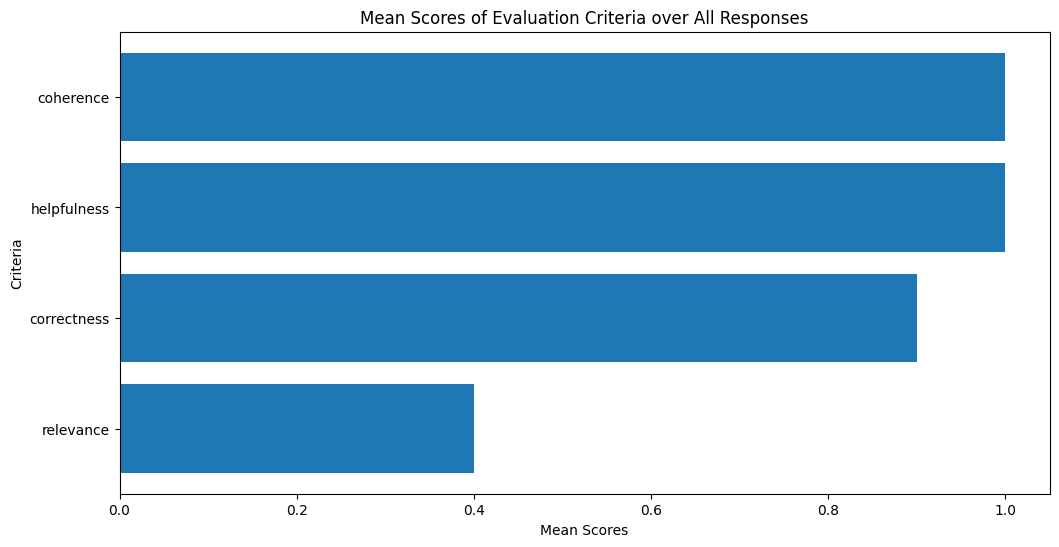

In [10]:
plt.figure(figsize=(12, 6))
plt.barh(meta_df.index[::-1], meta_df["mean"][::-1])
plt.xlabel("Mean Scores")
plt.ylabel("Criteria")
plt.title("Mean Scores of Evaluation Criteria over All Responses")
plt.show()